In [1]:
import pandas as pd
import os 

In [2]:
#df=pd.read_csv(r"D:\Jupyter notebook\Sales\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_April_2019.csv")

Merge the 12 months of sales data into a single csv file

In [3]:
#df=pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files=[file for file in os.listdir('./Sales_Data')]

all_months_data=pd.DataFrame()

for file in files:
    df=pd.read_csv("./Sales_Data/"+file)
    all_months_data=pd.concat([all_months_data,df])
    
all_months_data.to_csv("all_data.csv",index=False)


In [39]:
all_data=pd.read_csv("all_data.csv")
all_data

Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
1           NaN                         NaN              NaN        NaN   
2        176559  Bose SoundSport Headphones                1      99.99   
3        176560                Google Phone                1        600   
4        176560            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186845   259353      AAA Batteries (4-pack)                3       2.99   
186846   259354                      iPhone                1        700   
186847   259355                      iPhone                1        700   
186848   259356      34in Ultrawide Monitor                1     379.99   
186849   259357        USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address  
0       04/19/19 08:46             917 1st St, Dallas, TX 75001  
1                  NaN                                      NaN  
2       04/07/19 22:30        682 Chestnut St, Boston, MA 02215  
3       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001  
4       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001  
...                ...                                      ...  
186845  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001  
186846  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016  
186847  09/23/19 07:39     220 12th St, San Francisco, CA 94016  
186848  09/19/19 17:30   511 Forest St, San Francisco, CA 94016  
186849  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016  

[186850 rows x 6 columns]

# #Augment data with additional columns

In [40]:
all_data.isna().sum().sum()    #total null values we have to clean up it 

3270

In [41]:
all_data[all_data.isna().any(axis=1)].head()           #all null value rows 

all_data=all_data.dropna(how='all')
all_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001

In [42]:
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']

In [43]:
all_data['Month']=all_data["Order Date"].str[0:2]    
all_data['Month']=all_data["Month"].astype('int32')   #convert into integer typecast
all_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  Month  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4

Add a sales columns

Convert  Columns to the correct type int

In [44]:
all_data["Quantity Ordered"]=pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"]=pd.to_numeric(all_data["Price Each"])

In [45]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']   # here the Price is in string form so we can multiplye
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month   Sales  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4   23.90  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4   99.99  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  600.00  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   11.99  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4   11.99

Q1.What was the best month for sales ? How much was earned the month?

In [46]:
# we have succesfully create month and sales columns now we can do this 
all_data.groupby("Month").sum()

Quantity Ordered  Price Each       Sales
Month                                          
1                 10903  1811768.38  1822256.73
2                 13449  2188884.72  2202022.42
3                 17005  2791207.83  2807100.38
4                 20558  3367671.02  3390670.24
5                 18667  3135125.13  3152606.75
6                 15253  2562025.61  2577802.26
7                 16072  2632539.56  2647775.76
8                 13448  2230345.42  2244467.88
9                 13109  2084992.09  2097560.13
10                22703  3715554.83  3736726.88
11                19798  3180600.68  3199603.20
12                28114  4588415.41  4613443.34

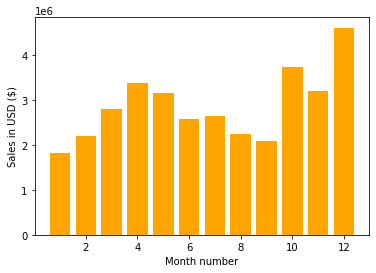

In [47]:
import matplotlib.pyplot as plt
months=range(1,13)

results=all_data.groupby("Month").sum()

plt.bar(months,results['Sales'],color="orange")
#plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel("Month number")
plt.show()

Q2.What city had the highest number of sales

1st add city columns

df['Columns']=df['Purchase Address'].apply(lambda x,x.split(',')[1]) # use apply method and get purchase add of 1 index by split

In [48]:
all_data['city']=all_data['Purchase Address'].apply(lambda x:x.split(',')[1])
# all_data=all_data.drop(columns="columns_name",inplace=True)  drop the unnecessery columns
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month   Sales  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4   23.90   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4   99.99   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  600.00   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   11.99   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4   11.99   

           city  
0        Dallas  
2        Boston  
3   Los Angeles  
4   Los Angeles  
5   Los Angeles

In [49]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['city']=all_data['Purchase Address'].apply(lambda x:f"{get_city(x)}({get_state(x)})")
all_data.head()
                                                    

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month   Sales  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4   23.90   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4   99.99   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  600.00   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   11.99   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4   11.99   

               city  
0        Dallas(TX)  
2        Boston(MA)  
3   Los Angeles(CA)  
4   Los Angeles(CA)  
5   Los Angeles(CA)

In [50]:
all_data[all_data['Sales']==all_data['Sales'].max()]['city'] #by me

4717       San Francisco(CA)
5219       New York City(NY)
92026      San Francisco(CA)
127265            Boston(MA)
Name: city, dtype: object

In [51]:
results=all_data.groupby('city').sum()
results

Quantity Ordered  Price Each   Month       Sales
city                                                                
 Atlanta(GA)                   16602  2779908.20  104794  2795498.58
 Austin(TX)                    11153  1809873.61   69829  1819581.75
 Boston(MA)                    22528  3637409.77  141112  3661642.01
 Dallas(TX)                    16730  2752627.82  104620  2767975.40
 Los Angeles(CA)               33289  5421435.23  208325  5452570.80
 New York City(NY)             27932  4635370.83  175741  4664317.43
 Portland(ME)                   2750   447189.25   17144   449758.27
 Portland(OR)                  11303  1860558.22   70621  1870732.34
 San Francisco(CA)             50239  8211461.74  315520  8262203.91
 Seattle(WA)                   16553  2733296.01  104941  2747755.48

In [52]:

# plt.bar(results['city'],results['Sales'])
# plt.show()

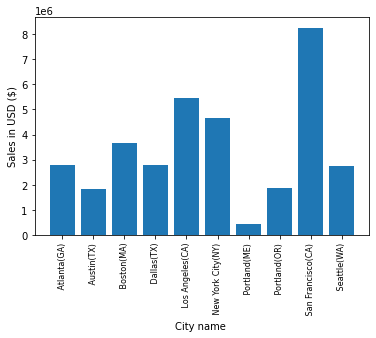

In [53]:
#cities=all_data['city'].unique()

cities=[city for city,df in all_data.groupby('city')]
#results=all_data.groupby("Month").sum()

plt.bar(cities,results['Sales'])
plt.xticks(cities,rotation='vertical',size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel("City name ")
plt.show()

In [54]:
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month   Sales  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4   23.90   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4   99.99   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  600.00   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   11.99   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4   11.99   

               city  
0        Dallas(TX)  
2        Boston(MA)  
3   Los Angeles(CA)  
4   Los Angeles(CA)  
5   Los Angeles(CA)

Q3.What time should we display advertisements to maximize likelihood of customer's buying products ?

In [55]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

In [56]:
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

           Order Date                      Purchase Address  Month   Sales  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001      4   23.90   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215      4   99.99   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4  600.00   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   11.99   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001      4   11.99   

               city  
0        Dallas(TX)  
2        Boston(MA)  
3   Los Angeles(CA)  
4   Los Angeles(CA)  
5   Los Angeles(CA)

In [57]:
all_data['Hour']=all_data["Order Date"].dt.hour     #fetch hours only 
all_data['Minute']=all_data["Order Date"].dt.minute
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

           Order Date                      Purchase Address  Month   Sales  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001      4   23.90   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215      4   99.99   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4  600.00   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   11.99   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001      4   11.99   

               city  Hour  Minute  
0        Dallas(TX)     8      46  
2        Boston(MA)    22      30  
3   Los Angeles(CA)    14      38  
4   Los Angeles(CA)    14      38  
5   Los Angeles(CA)     9      27

In [58]:
all_data.Hour.nunique()

24

In [64]:
all_data.Hour.unique()

array([ 8, 22, 14,  9, 13,  7, 10, 17, 12, 19, 15, 20, 18,  0, 11, 23, 21,
        4, 16,  5,  2,  1,  6,  3], dtype=int64)

In [60]:
results=all_data.groupby('Hour').sum()

In [72]:
results

Quantity Ordered  Price Each  Month       Sales  Minute
Hour                                                         
0                 4428   709296.70  27554   713721.27  103596
1                 2619   458490.00  16657   460866.88   61807
2                 1398   233833.64   8507   234851.44   32508
3                  928   144726.42   5904   145757.89   23044
4                  937   162058.18   6148   162661.01   26876
5                 1493   229621.21   9301   230679.82   42877
6                 2810   445000.11  17539   448113.00   80343
7                 4556   740568.11  28850   744854.12  127447
8                 7002  1185970.62  43626  1192348.97  198135
9                 9816  1628498.49  60981  1639030.58  268253
10               12308  1932665.62  76928  1944286.77  331941
11               14005  2288855.18  87654  2300610.24  368952
12               14202  2299876.68  89161  2316821.34  368679
13               13685  2139743.86  85808  2155389.80  351045
14               12362  2072194.77  77836  2083672.73  322563
15               11391  1931174.99  72060  1941549.60  299893
16               11662  1892454.54  72939  1904601.31  310132
17               12229  2116777.02  77454  2129361.61  323428
18               13802  2207696.93  86421  2219348.30  371688
19               14470  2398588.31  91389  2412938.54  381042
20               13768  2268185.16  86375  2281716.24  354086
21               12244  2030763.83  77103  2042000.86  312062
22                9899  1599464.44  62088  1607549.21  248503
23                7065  1172625.87  44364  1179304.44  173159

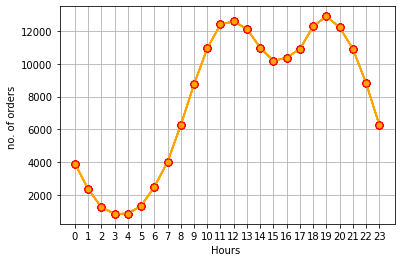

In [94]:
hours=[hour for hour,df in all_data.groupby('Hour')]
plt.plot(hours,all_data.groupby(['Hour']).count(),color='orange',marker='o',ms=7,mec='r')
plt.xlabel('Hours ')
plt.ylabel('no. of orders ')
plt.xticks(hours)
plt.grid()
#all_data.groupby(['Hour']).count()

plt.show()

Q4.what products are most often sold together ?

In [95]:
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

           Order Date                      Purchase Address  Month   Sales  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001      4   23.90   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215      4   99.99   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4  600.00   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   11.99   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001      4   11.99   

               city  Hour  Minute  
0        Dallas(TX)     8      46  
2        Boston(MA)    22      30  
3   Los Angeles(CA)    14      38  
4   Los Angeles(CA)    14      38  
5   Los Angeles(CA)     9      27

In [97]:
all_data.Product.nunique()

19

In [98]:
x=all_data.Product.unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [108]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]     #it show duplicate values 
#df.head(20)
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
#df.head()

# remove duplicates
df=df[['Order ID','Grouped']].drop_duplicates()
df.head()


C:\Users\bikash\AppData\Local\Temp\ipykernel_17236\3414524654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


Order ID                                            Grouped
3     176560                      Google Phone,Wired Headphones
18    176574                  Google Phone,USB-C Charging Cable
30    176585  Bose SoundSport Headphones,Bose SoundSport Hea...
32    176586                AAA Batteries (4-pack),Google Phone
119   176672      Lightning Charging Cable,USB-C Charging Cable

In [117]:
from itertools import combinations
from collections import Counter

count=Counter()

for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
#print(count)
#count.most_common(10)           #most common items 
for key,value in count.most_common(10):
    print(key,value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Q5.What Product sold most? why do you think it sold the most?

In [127]:
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

           Order Date                      Purchase Address  Month   Sales  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001      4   23.90   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215      4   99.99   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4  600.00   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   11.99   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001      4   11.99   

               city  Hour  Minute  
0        Dallas(TX)     8      46  
2        Boston(MA)    22      30  
3   Los Angeles(CA)    14      38  
4   Los Angeles(CA)    14      38  
5   Los Angeles(CA)     9      27

In [130]:
product_group=all_data.groupby('Product')
product_group.sum()  # quantity of product 


Quantity Ordered  Price Each   Month       Sales  \
Product                                                                        
20in Monitor                            4129   451068.99   29336   454148.71   
27in 4K Gaming Monitor                  6244  2429637.70   44440  2435097.56   
27in FHD Monitor                        7550  1125974.93   52558  1132424.50   
34in Ultrawide Monitor                  6199  2348718.19   43304  2355558.01   
AA Batteries (4-pack)                  27635    79015.68  145558   106118.40   
AAA Batteries (4-pack)                 31017    61716.59  146370    92740.83   
Apple Airpods Headphones               15661  2332350.00  109477  2349150.00   
Bose SoundSport Headphones             13457  1332366.75   94113  1345565.43   
Flatscreen TV                           4819  1440000.00   34224  1445700.00   
Google Phone                            5532  3315000.00   38305  3319200.00   
LG Dryer                                 646   387600.00    4383   387600.00   
LG Washing Machine                       666   399600.00    4523   399600.00   
Lightning Charging Cable               23217   323787.10  153092   347094.15   
Macbook Pro Laptop                      4728  8030800.00   33548  8037600.00   
ThinkPad Laptop                         4130  4127958.72   28950  4129958.70   
USB-C Charging Cable                   23975   261740.85  154819   286501.25   
Vareebadd Phone                         2068   826000.00   14309   827200.00   
Wired Headphones                       20557   226395.18  133397   246478.43   
iPhone                                  6849  4789400.00   47941  4794300.00   

                              Hour  Minute  
Product                                     
20in Monitor                 58764  122252  
27in 4K Gaming Monitor       90916  184331  
27in FHD Monitor            107540  219948  
34in Ultrawide Monitor       89076  183480  
AA Batteries (4-pack)       298342  609039  
AAA Batteries (4-pack)      297332  612113  
Apple Airpods Headphones    223304  455570  
Bose SoundSport Headphones  192445  392603  
Flatscreen TV                68815  142789  
Google Phone                 79479  162773  
LG Dryer                      9326   19043  
LG Washing Machine            9785   19462  
Lightning Charging Cable    312529  634442  
Macbook Pro Laptop           68261  137574  
ThinkPad Laptop              59746  121508  
USB-C Charging Cable        314645  647586  
Vareebadd Phone              29472   61835  
Wired Headphones            271720  554023  
iPhone                       98657  201688

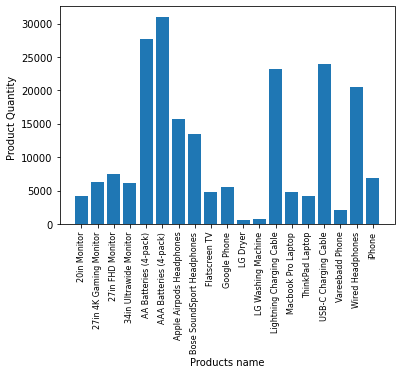

In [134]:
product_group=all_data.groupby('Product')
quantity_ordered=product_group.sum()['Quantity Ordered']   
plt.ylabel("Product Quantity ")
products=[product for product,df in product_group]
plt.xlabel('Products name')
plt.bar(products,quantity_ordered)

plt.xticks(products,rotation='vertical',size=8)
plt.show()

In [136]:
prices=all_data.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


C:\Users\bikash\AppData\Local\Temp\ipykernel_17236\2437787256.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)


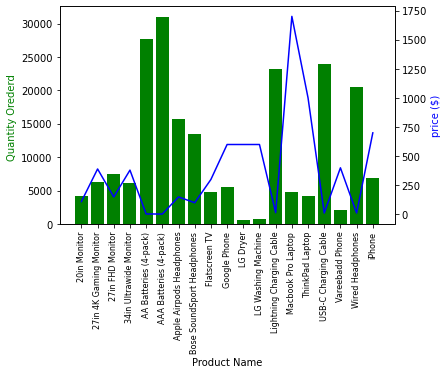

In [144]:
prices=all_data.groupby('Product').mean()['Price Each']

fig,ax1=plt.subplots()

ax2= ax1.twinx()
ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products,prices,'b-')

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Orederd ",color='g')
ax2.set_ylabel("price ($)",color='b')
ax1.set_xticklabels(products,rotation='vertical',size=8)

plt.show()